### google colab setup for accessing the file store in drive

In [0]:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
    !apt-get update -qq 2>&1 > /dev/null
    !apt-get -y install -qq google-drive-ocamlfuse fuse
    from google.colab import auth
    auth.authenticate_user()
    from oauth2client.client import GoogleCredentials
    creds = GoogleCredentials.get_application_default()
    import getpass
    !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
    vcode = getpass.getpass()
    !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

# **Facial Emotion Recognition**

https://github.com/oarriaga/face_classification

https://github.com/JostineHo/mememoji

Dataset - https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


## Dataset
* The data consists of 48x48 pixel grayscale images of faces. 
* The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. 
* The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
* Dataset contains two columns, "emotion" and "pixels".
* The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. 
* The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

# Data Visualization

In [0]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [0]:
df = pd.read_csv("drive/Colab Notebooks/emotion/fer2013.csv")
df.head()

,Unnamed: 0,emotion,pixels,Usage
0,0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
df.shape

(35887, 4)

## **Plotting emotion**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


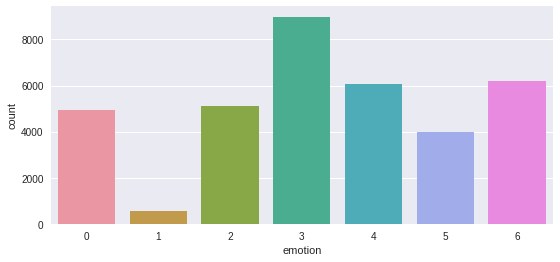

In [0]:
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [0]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

* where** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral**

### Observation
* for Digust we have about 547 images only very less. 

## **Plotting Usage**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


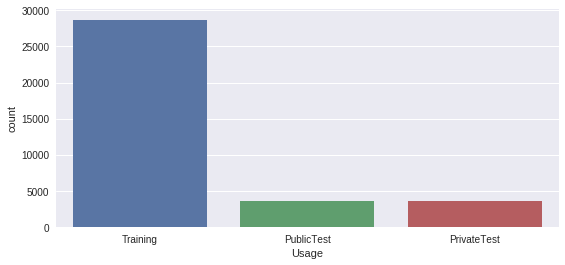

In [0]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [0]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

# PreProcessing

In [0]:
import cv2
image_size=(48,48)

In [0]:
pixels = df['pixels'].tolist() # Converting the relevant column element into a list for each row
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')] # Splitting the string by space character as a list
  face = np.asarray(face).reshape(width, height) #converting the list to numpy array in size of 48*48
  face = cv2.resize(face.astype('uint8'),image_size) #resize the image to have 48 cols (width) and 48 rows (height)
  faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form
  
faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension
emotions = pd.get_dummies(df['emotion']).as_matrix() #doing the one hot encoding type on emotions

In [0]:
print(faces[0]) #Pixels after preprocessing

[[[ 70.]
  [ 80.]
  [ 82.]
  ...
  [ 52.]
  [ 43.]
  [ 41.]]

 [[ 65.]
  [ 61.]
  [ 58.]
  ...
  [ 56.]
  [ 52.]
  [ 44.]]

 [[ 50.]
  [ 43.]
  [ 54.]
  ...
  [ 49.]
  [ 56.]
  [ 47.]]

 ...

 [[ 91.]
  [ 65.]
  [ 42.]
  ...
  [ 72.]
  [ 56.]
  [ 43.]]

 [[ 77.]
  [ 82.]
  [ 79.]
  ...
  [105.]
  [ 70.]
  [ 46.]]

 [[ 77.]
  [ 72.]
  [ 84.]
  ...
  [106.]
  [109.]
  [ 82.]]]


In [0]:
print(faces.shape)
print(faces[0].ndim)
print(type(faces))

(35887, 48, 48, 1)
3
<class 'numpy.ndarray'>


In [0]:
print(emotions[0]) #Emotion after preprocessing

[1 0 0 0 0 0 0]


In [0]:
print(emotions.shape)
print(emotions.ndim)
print(type(emotions))

(35887, 7)
2
<class 'numpy.ndarray'>


# Splitting the dataset

## Scaling the pixels between -1 and 1

In [0]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [0]:
print(x[0])

[[[-0.45098037]
  [-0.372549  ]
  [-0.35686272]
  ...
  [-0.5921569 ]
  [-0.6627451 ]
  [-0.6784314 ]]

 [[-0.49019605]
  [-0.52156866]
  [-0.54509807]
  ...
  [-0.56078434]
  [-0.5921569 ]
  [-0.654902  ]]

 [[-0.60784316]
  [-0.6627451 ]
  [-0.5764706 ]
  ...
  [-0.6156863 ]
  [-0.56078434]
  [-0.6313726 ]]

 ...

 [[-0.2862745 ]
  [-0.49019605]
  [-0.67058825]
  ...
  [-0.4352941 ]
  [-0.56078434]
  [-0.6627451 ]]

 [[-0.3960784 ]
  [-0.35686272]
  [-0.38039213]
  ...
  [-0.17647058]
  [-0.45098037]
  [-0.6392157 ]]

 [[-0.3960784 ]
  [-0.4352941 ]
  [-0.34117645]
  ...
  [-0.16862744]
  [-0.14509803]
  [-0.35686272]]]


In [0]:
type(x)

numpy.ndarray

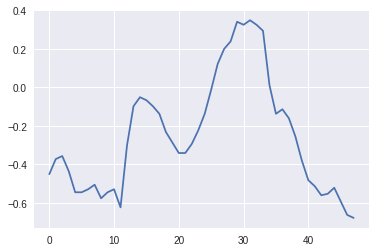

In [0]:
plt.plot(x[0][0])
plt.show()

In [0]:
print(x.min(),x.max()) # we can observe that pixels are scale

-1.0 1.0


## Splitting the dataset into train & validation set

In [0]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [0]:
print('Training Pixels',train_x.shape)
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


# Defining Model

In [0]:
#load the libaray to built the model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

Using TensorFlow backend.


# 1) Simpler CNN

In [0]:
input_shape=(48, 48, 1)
num_classes = 7

In [0]:
model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))



* why to use the globalaveragePooling2d()
* Refer : http://forums.fast.ai/t/globalaveragepooling2d-use/8358

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
__________

In [0]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7 
patience = 50
base_path = 'drive/Colab Notebooks/emotion/simplecnn/'

In [0]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

## Data Augmenttion

In [0]:
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

why to do data augmentation refer-https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085

In [0]:
# model parameters/compilation
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 16)        0         
__________

In [0]:
datasets = ['fer2013']
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    # callbacks
    log_file_path = base_path + dataset_name + '_emotion_training.log'
    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(patience/4), verbose=1)
    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
    callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = train_data
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        epochs=num_epochs, verbose=1, callbacks=callbacks,
                        validation_data=val_data)

Training dataset: fer2013
Epoch 1/200
898/898 [==============================] - 43s 48ms/step - loss: 1.6874 - acc: 0.3304 - val_loss: 1.5832 - val_acc: 0.3831

Epoch 00001: val_loss improved from inf to 1.58317, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.01-0.38.hdf5
Epoch 2/200
153/898 [====>.........................] - ETA: 36s - loss: 1.6328 - acc: 0.3636

898/898 [==============================] - 45s 50ms/step - loss: 1.6128 - acc: 0.3649 - val_loss: 1.5209 - val_acc: 0.3986

Epoch 00002: val_loss improved from 1.58317 to 1.52088, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.02-0.40.hdf5
Epoch 3/200
256/898 [=======>......................] - ETA: 30s - loss: 1.5769 - acc: 0.3837

898/898 [==============================] - 45s 50ms/step - loss: 1.5531 - acc: 0.3929 - val_loss: 1.4383 - val_acc: 0.4478

Epoch 00003: val_loss improved from 1.52088 to 1.43832, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.03-0.45.hdf5
Epoch 4/200
274/898 [========>.....................] - ETA: 30s - loss: 1.5129 - acc: 0.4085

898/898 [==============================] - 45s 50ms/step - loss: 1.4972 - acc: 0.4160 - val_loss: 1.3600 - val_acc: 0.4834

Epoch 00004: val_loss improved from 1.43832 to 1.36000, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.04-0.48.hdf5
Epoch 5/200
311/898 [=========>....................] - ETA: 27s - loss: 1.4662 - acc: 0.4336

898/898 [==============================] - 45s 50ms/step - loss: 1.4651 - acc: 0.4338 - val_loss: 1.3241 - val_acc: 0.4979

Epoch 00005: val_loss improved from 1.36000 to 1.32412, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.05-0.50.hdf5
Epoch 6/200
298/898 [========>.....................] - ETA: 28s - loss: 1.4480 - acc: 0.4426

898/898 [==============================] - 44s 49ms/step - loss: 1.4414 - acc: 0.4440 - val_loss: 1.3014 - val_acc: 0.5022

Epoch 00006: val_loss improved from 1.32412 to 1.30142, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.06-0.50.hdf5
Epoch 7/200
325/898 [=========>....................] - ETA: 26s - loss: 1.4338 - acc: 0.4514

898/898 [==============================] - 43s 48ms/step - loss: 1.4242 - acc: 0.4526 - val_loss: 1.3242 - val_acc: 0.5000

Epoch 00007: val_loss did not improve from 1.30142
Epoch 8/200
526/898 [================>.............] - ETA: 16s - loss: 1.4055 - acc: 0.4590

898/898 [==============================] - 41s 46ms/step - loss: 1.4033 - acc: 0.4620 - val_loss: 1.2845 - val_acc: 0.5071

Epoch 00008: val_loss improved from 1.30142 to 1.28451, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.08-0.51.hdf5
Epoch 9/200
452/898 [==============>...............] - ETA: 18s - loss: 1.3815 - acc: 0.4663

898/898 [==============================] - 41s 45ms/step - loss: 1.3878 - acc: 0.4652 - val_loss: 1.2642 - val_acc: 0.5077

Epoch 00009: val_loss improved from 1.28451 to 1.26416, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.09-0.51.hdf5
Epoch 10/200
435/898 [=============>................] - ETA: 19s - loss: 1.3752 - acc: 0.4780

898/898 [==============================] - 39s 44ms/step - loss: 1.3779 - acc: 0.4739 - val_loss: 1.2393 - val_acc: 0.5251

Epoch 00010: val_loss improved from 1.26416 to 1.23929, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.10-0.53.hdf5
Epoch 11/200
435/898 [=============>................] - ETA: 19s - loss: 1.3638 - acc: 0.4798

898/898 [==============================] - 39s 44ms/step - loss: 1.3679 - acc: 0.4781 - val_loss: 1.2115 - val_acc: 0.5348

Epoch 00011: val_loss improved from 1.23929 to 1.21151, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.11-0.53.hdf5
Epoch 12/200
431/898 [=============>................] - ETA: 19s - loss: 1.3657 - acc: 0.4805

898/898 [==============================] - 39s 43ms/step - loss: 1.3583 - acc: 0.4818 - val_loss: 1.2144 - val_acc: 0.5350

Epoch 00012: val_loss did not improve from 1.21151
Epoch 13/200
589/898 [==================>...........] - ETA: 12s - loss: 1.3499 - acc: 0.4839

898/898 [==============================] - 39s 43ms/step - loss: 1.3465 - acc: 0.4828 - val_loss: 1.2360 - val_acc: 0.5315

Epoch 00013: val_loss did not improve from 1.21151
Epoch 14/200
625/898 [===================>..........] - ETA: 11s - loss: 1.3362 - acc: 0.4893

898/898 [==============================] - 41s 45ms/step - loss: 1.3377 - acc: 0.4890 - val_loss: 1.2083 - val_acc: 0.5369

Epoch 00014: val_loss improved from 1.21151 to 1.20834, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.14-0.54.hdf5
Epoch 15/200
471/898 [==============>...............] - ETA: 18s - loss: 1.3323 - acc: 0.4887

898/898 [==============================] - 41s 45ms/step - loss: 1.3298 - acc: 0.4930 - val_loss: 1.1906 - val_acc: 0.5361

Epoch 00015: val_loss improved from 1.20834 to 1.19059, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.15-0.54.hdf5
Epoch 16/200
443/898 [=============>................] - ETA: 19s - loss: 1.3049 - acc: 0.5016

898/898 [==============================] - 40s 45ms/step - loss: 1.3206 - acc: 0.4949 - val_loss: 1.1943 - val_acc: 0.5369

Epoch 00016: val_loss did not improve from 1.19059
Epoch 17/200
590/898 [==================>...........] - ETA: 12s - loss: 1.3174 - acc: 0.4951

898/898 [==============================] - 40s 45ms/step - loss: 1.3193 - acc: 0.4986 - val_loss: 1.2014 - val_acc: 0.5362

Epoch 00017: val_loss did not improve from 1.19059
Epoch 18/200
638/898 [====================>.........] - ETA: 10s - loss: 1.3131 - acc: 0.4965

898/898 [==============================] - 39s 44ms/step - loss: 1.3086 - acc: 0.4985 - val_loss: 1.1931 - val_acc: 0.5476

Epoch 00018: val_loss did not improve from 1.19059
Epoch 19/200
651/898 [====================>.........] - ETA: 10s - loss: 1.3149 - acc: 0.4967

898/898 [==============================] - 39s 44ms/step - loss: 1.3099 - acc: 0.4995 - val_loss: 1.1609 - val_acc: 0.5560

Epoch 00019: val_loss improved from 1.19059 to 1.16091, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.19-0.56.hdf5
Epoch 20/200
480/898 [===============>..............] - ETA: 17s - loss: 1.3005 - acc: 0.5016

898/898 [==============================] - 39s 43ms/step - loss: 1.3061 - acc: 0.5017 - val_loss: 1.2250 - val_acc: 0.5294

Epoch 00020: val_loss did not improve from 1.16091
Epoch 21/200
603/898 [===================>..........] - ETA: 12s - loss: 1.3011 - acc: 0.5027

898/898 [==============================] - 39s 43ms/step - loss: 1.3006 - acc: 0.5021 - val_loss: 1.1723 - val_acc: 0.5518

Epoch 00021: val_loss did not improve from 1.16091
Epoch 22/200
634/898 [====================>.........] - ETA: 11s - loss: 1.3013 - acc: 0.5038

898/898 [==============================] - 41s 45ms/step - loss: 1.2975 - acc: 0.5073 - val_loss: 1.1642 - val_acc: 0.5592

Epoch 00022: val_loss did not improve from 1.16091
Epoch 23/200
645/898 [====================>.........] - ETA: 10s - loss: 1.2872 - acc: 0.5078

898/898 [==============================] - 39s 44ms/step - loss: 1.2860 - acc: 0.5079 - val_loss: 1.1946 - val_acc: 0.5474

Epoch 00023: val_loss did not improve from 1.16091
Epoch 24/200
656/898 [====================>.........] - ETA: 9s - loss: 1.2878 - acc: 0.5077

898/898 [==============================] - 39s 43ms/step - loss: 1.2854 - acc: 0.5092 - val_loss: 1.1682 - val_acc: 0.5549

Epoch 00024: val_loss did not improve from 1.16091
Epoch 25/200
655/898 [====================>.........] - ETA: 9s - loss: 1.2822 - acc: 0.5100 

898/898 [==============================] - 39s 43ms/step - loss: 1.2867 - acc: 0.5083 - val_loss: 1.1534 - val_acc: 0.5632

Epoch 00025: val_loss improved from 1.16091 to 1.15338, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.25-0.56.hdf5
Epoch 26/200
416/898 [============>.................] - ETA: 22s - loss: 1.2910 - acc: 0.5054

898/898 [==============================] - 44s 48ms/step - loss: 1.2847 - acc: 0.5080 - val_loss: 1.1639 - val_acc: 0.5606

Epoch 00026: val_loss did not improve from 1.15338
Epoch 27/200
555/898 [=================>............] - ETA: 14s - loss: 1.2797 - acc: 0.5159

898/898 [==============================] - 41s 46ms/step - loss: 1.2820 - acc: 0.5143 - val_loss: 1.1821 - val_acc: 0.5548

Epoch 00027: val_loss did not improve from 1.15338
Epoch 28/200
624/898 [===================>..........] - ETA: 11s - loss: 1.2813 - acc: 0.5097

898/898 [==============================] - 40s 44ms/step - loss: 1.2779 - acc: 0.5139 - val_loss: 1.1370 - val_acc: 0.5637

Epoch 00028: val_loss improved from 1.15338 to 1.13700, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.28-0.56.hdf5
Epoch 29/200
471/898 [==============>...............] - ETA: 17s - loss: 1.2660 - acc: 0.5175

898/898 [==============================] - 41s 45ms/step - loss: 1.2744 - acc: 0.5151 - val_loss: 1.1647 - val_acc: 0.5538

Epoch 00029: val_loss did not improve from 1.13700
Epoch 30/200
596/898 [==================>...........] - ETA: 12s - loss: 1.2739 - acc: 0.5139

898/898 [==============================] - 39s 43ms/step - loss: 1.2736 - acc: 0.5142 - val_loss: 1.1206 - val_acc: 0.5741

Epoch 00030: val_loss improved from 1.13700 to 1.12059, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.30-0.57.hdf5
Epoch 31/200
467/898 [==============>...............] - ETA: 17s - loss: 1.2652 - acc: 0.5179

898/898 [==============================] - 39s 44ms/step - loss: 1.2650 - acc: 0.5197 - val_loss: 1.1344 - val_acc: 0.5649

Epoch 00031: val_loss did not improve from 1.12059
Epoch 32/200
602/898 [===================>..........] - ETA: 12s - loss: 1.2722 - acc: 0.5136

898/898 [==============================] - 39s 43ms/step - loss: 1.2688 - acc: 0.5163 - val_loss: 1.1299 - val_acc: 0.5655

Epoch 00032: val_loss did not improve from 1.12059
Epoch 33/200
624/898 [===================>..........] - ETA: 11s - loss: 1.2620 - acc: 0.5219

898/898 [==============================] - 41s 46ms/step - loss: 1.2617 - acc: 0.5208 - val_loss: 1.1420 - val_acc: 0.5674

Epoch 00033: val_loss did not improve from 1.12059
Epoch 34/200
632/898 [====================>.........] - ETA: 11s - loss: 1.2648 - acc: 0.5185

898/898 [==============================] - 41s 46ms/step - loss: 1.2645 - acc: 0.5157 - val_loss: 1.1338 - val_acc: 0.5655

Epoch 00034: val_loss did not improve from 1.12059
Epoch 35/200
649/898 [====================>.........] - ETA: 10s - loss: 1.2584 - acc: 0.5235

898/898 [==============================] - 40s 44ms/step - loss: 1.2607 - acc: 0.5210 - val_loss: 1.1195 - val_acc: 0.5733

Epoch 00035: val_loss improved from 1.12059 to 1.11949, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.35-0.57.hdf5
Epoch 36/200
481/898 [===============>..............] - ETA: 17s - loss: 1.2716 - acc: 0.5103

898/898 [==============================] - 40s 44ms/step - loss: 1.2590 - acc: 0.5187 - val_loss: 1.1275 - val_acc: 0.5681

Epoch 00036: val_loss did not improve from 1.11949
Epoch 37/200
600/898 [===================>..........] - ETA: 12s - loss: 1.2560 - acc: 0.5191

898/898 [==============================] - 39s 43ms/step - loss: 1.2535 - acc: 0.5222 - val_loss: 1.1328 - val_acc: 0.5634

Epoch 00037: val_loss did not improve from 1.11949
Epoch 38/200
643/898 [====================>.........] - ETA: 10s - loss: 1.2519 - acc: 0.5180

898/898 [==============================] - 39s 44ms/step - loss: 1.2524 - acc: 0.5197 - val_loss: 1.1176 - val_acc: 0.5712

Epoch 00038: val_loss improved from 1.11949 to 1.11765, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.38-0.57.hdf5
Epoch 39/200
353/898 [==========>...................] - ETA: 26s - loss: 1.2534 - acc: 0.5194

898/898 [==============================] - 45s 50ms/step - loss: 1.2511 - acc: 0.5220 - val_loss: 1.1175 - val_acc: 0.5734

Epoch 00039: val_loss improved from 1.11765 to 1.11746, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.39-0.57.hdf5
Epoch 40/200
302/898 [=========>....................] - ETA: 28s - loss: 1.2491 - acc: 0.5279

898/898 [==============================] - 44s 50ms/step - loss: 1.2508 - acc: 0.5272 - val_loss: 1.1171 - val_acc: 0.5743

Epoch 00040: val_loss improved from 1.11746 to 1.11713, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.40-0.57.hdf5
Epoch 41/200
314/898 [=========>....................] - ETA: 27s - loss: 1.2469 - acc: 0.5281

898/898 [==============================] - 44s 49ms/step - loss: 1.2537 - acc: 0.5236 - val_loss: 1.1081 - val_acc: 0.5775

Epoch 00041: val_loss improved from 1.11713 to 1.10812, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.41-0.58.hdf5
Epoch 42/200
301/898 [=========>....................] - ETA: 28s - loss: 1.2270 - acc: 0.5328

898/898 [==============================] - 44s 49ms/step - loss: 1.2440 - acc: 0.5264 - val_loss: 1.1079 - val_acc: 0.5726

Epoch 00042: val_loss improved from 1.10812 to 1.10786, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.42-0.57.hdf5
Epoch 43/200
329/898 [=========>....................] - ETA: 26s - loss: 1.2303 - acc: 0.5369

898/898 [==============================] - 43s 48ms/step - loss: 1.2433 - acc: 0.5283 - val_loss: 1.1308 - val_acc: 0.5750

Epoch 00043: val_loss did not improve from 1.10786
Epoch 44/200
532/898 [================>.............] - ETA: 15s - loss: 1.2388 - acc: 0.5300

898/898 [==============================] - 40s 45ms/step - loss: 1.2427 - acc: 0.5278 - val_loss: 1.1022 - val_acc: 0.5816

Epoch 00044: val_loss improved from 1.10786 to 1.10225, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.44-0.58.hdf5
Epoch 45/200
443/898 [=============>................] - ETA: 19s - loss: 1.2359 - acc: 0.5292

898/898 [==============================] - 42s 46ms/step - loss: 1.2424 - acc: 0.5271 - val_loss: 1.1048 - val_acc: 0.5754

Epoch 00045: val_loss did not improve from 1.10225
Epoch 46/200
586/898 [==================>...........] - ETA: 12s - loss: 1.2349 - acc: 0.5290

898/898 [==============================] - 40s 44ms/step - loss: 1.2385 - acc: 0.5268 - val_loss: 1.1034 - val_acc: 0.5783

Epoch 00046: val_loss did not improve from 1.10225
Epoch 47/200
631/898 [====================>.........] - ETA: 11s - loss: 1.2312 - acc: 0.5365

898/898 [==============================] - 40s 44ms/step - loss: 1.2387 - acc: 0.5328 - val_loss: 1.1057 - val_acc: 0.5727

Epoch 00047: val_loss did not improve from 1.10225
Epoch 48/200
647/898 [====================>.........] - ETA: 10s - loss: 1.2392 - acc: 0.5296

898/898 [==============================] - 39s 44ms/step - loss: 1.2407 - acc: 0.5294 - val_loss: 1.0987 - val_acc: 0.5834

Epoch 00048: val_loss improved from 1.10225 to 1.09874, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.48-0.58.hdf5
Epoch 49/200
477/898 [==============>...............] - ETA: 17s - loss: 1.2348 - acc: 0.5292

898/898 [==============================] - 39s 44ms/step - loss: 1.2387 - acc: 0.5254 - val_loss: 1.1094 - val_acc: 0.5733

Epoch 00049: val_loss did not improve from 1.09874
Epoch 50/200
594/898 [==================>...........] - ETA: 12s - loss: 1.2340 - acc: 0.5286

898/898 [==============================] - 40s 44ms/step - loss: 1.2370 - acc: 0.5279 - val_loss: 1.1253 - val_acc: 0.5684

Epoch 00050: val_loss did not improve from 1.09874
Epoch 51/200
618/898 [===================>..........] - ETA: 12s - loss: 1.2366 - acc: 0.5296

898/898 [==============================] - 41s 46ms/step - loss: 1.2362 - acc: 0.5290 - val_loss: 1.1095 - val_acc: 0.5722

Epoch 00051: val_loss did not improve from 1.09874
Epoch 52/200
628/898 [===================>..........] - ETA: 11s - loss: 1.2325 - acc: 0.5302

898/898 [==============================] - 41s 46ms/step - loss: 1.2349 - acc: 0.5289 - val_loss: 1.1044 - val_acc: 0.5777

Epoch 00052: val_loss did not improve from 1.09874
Epoch 53/200
643/898 [====================>.........] - ETA: 10s - loss: 1.2359 - acc: 0.5254

898/898 [==============================] - 41s 45ms/step - loss: 1.2332 - acc: 0.5271 - val_loss: 1.1089 - val_acc: 0.5759

Epoch 00053: val_loss did not improve from 1.09874
Epoch 54/200
647/898 [====================>.........] - ETA: 10s - loss: 1.2294 - acc: 0.5331

898/898 [==============================] - 40s 44ms/step - loss: 1.2330 - acc: 0.5301 - val_loss: 1.0961 - val_acc: 0.5770

Epoch 00054: val_loss improved from 1.09874 to 1.09613, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.54-0.58.hdf5
Epoch 55/200
483/898 [===============>..............] - ETA: 17s - loss: 1.2337 - acc: 0.5306

898/898 [==============================] - 40s 44ms/step - loss: 1.2324 - acc: 0.5294 - val_loss: 1.1241 - val_acc: 0.5674

Epoch 00055: val_loss did not improve from 1.09613
Epoch 56/200
608/898 [===================>..........] - ETA: 11s - loss: 1.2292 - acc: 0.5328

898/898 [==============================] - 39s 43ms/step - loss: 1.2327 - acc: 0.5300 - val_loss: 1.1232 - val_acc: 0.5706

Epoch 00056: val_loss did not improve from 1.09613
Epoch 57/200
621/898 [===================>..........] - ETA: 12s - loss: 1.2288 - acc: 0.5334

898/898 [==============================] - 41s 46ms/step - loss: 1.2293 - acc: 0.5327 - val_loss: 1.1553 - val_acc: 0.5595

Epoch 00057: val_loss did not improve from 1.09613
Epoch 58/200
635/898 [====================>.........] - ETA: 10s - loss: 1.2343 - acc: 0.5325

898/898 [==============================] - 40s 45ms/step - loss: 1.2319 - acc: 0.5344 - val_loss: 1.0919 - val_acc: 0.5830

Epoch 00058: val_loss improved from 1.09613 to 1.09186, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.58-0.58.hdf5
Epoch 59/200
478/898 [==============>...............] - ETA: 17s - loss: 1.2221 - acc: 0.5326

898/898 [==============================] - 39s 43ms/step - loss: 1.2216 - acc: 0.5353 - val_loss: 1.1154 - val_acc: 0.5726

Epoch 00059: val_loss did not improve from 1.09186
Epoch 60/200
607/898 [===================>..........] - ETA: 12s - loss: 1.2098 - acc: 0.5417

898/898 [==============================] - 39s 44ms/step - loss: 1.2214 - acc: 0.5361 - val_loss: 1.0993 - val_acc: 0.5783

Epoch 00060: val_loss did not improve from 1.09186
Epoch 61/200
608/898 [===================>..........] - ETA: 12s - loss: 1.2180 - acc: 0.5353

898/898 [==============================] - 42s 47ms/step - loss: 1.2234 - acc: 0.5347 - val_loss: 1.0998 - val_acc: 0.5804

Epoch 00061: val_loss did not improve from 1.09186
Epoch 62/200
628/898 [===================>..........] - ETA: 11s - loss: 1.2316 - acc: 0.5376

898/898 [==============================] - 41s 45ms/step - loss: 1.2270 - acc: 0.5381 - val_loss: 1.0932 - val_acc: 0.5844

Epoch 00062: val_loss did not improve from 1.09186
Epoch 63/200
642/898 [====================>.........] - ETA: 10s - loss: 1.2275 - acc: 0.5341

898/898 [==============================] - 39s 43ms/step - loss: 1.2232 - acc: 0.5354 - val_loss: 1.1119 - val_acc: 0.5754

Epoch 00063: val_loss did not improve from 1.09186
Epoch 64/200
648/898 [====================>.........] - ETA: 10s - loss: 1.2165 - acc: 0.5356

898/898 [==============================] - 40s 45ms/step - loss: 1.2189 - acc: 0.5348 - val_loss: 1.1032 - val_acc: 0.5744

Epoch 00064: val_loss did not improve from 1.09186
Epoch 65/200
653/898 [====================>.........] - ETA: 10s - loss: 1.2201 - acc: 0.5364

898/898 [==============================] - 40s 45ms/step - loss: 1.2201 - acc: 0.5368 - val_loss: 1.0789 - val_acc: 0.5853

Epoch 00065: val_loss improved from 1.09186 to 1.07892, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.65-0.59.hdf5
Epoch 66/200
481/898 [===============>..............] - ETA: 17s - loss: 1.2161 - acc: 0.5378

898/898 [==============================] - 40s 45ms/step - loss: 1.2155 - acc: 0.5396 - val_loss: 1.0885 - val_acc: 0.5825

Epoch 00066: val_loss did not improve from 1.07892
Epoch 67/200
598/898 [==================>...........] - ETA: 12s - loss: 1.2118 - acc: 0.5381

898/898 [==============================] - 39s 44ms/step - loss: 1.2176 - acc: 0.5359 - val_loss: 1.0747 - val_acc: 0.5868

Epoch 00067: val_loss improved from 1.07892 to 1.07473, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.67-0.59.hdf5
Epoch 68/200
397/898 [============>.................] - ETA: 23s - loss: 1.2101 - acc: 0.5371

898/898 [==============================] - 44s 49ms/step - loss: 1.2181 - acc: 0.5355 - val_loss: 1.1054 - val_acc: 0.5722

Epoch 00068: val_loss did not improve from 1.07473
Epoch 69/200
436/898 [=============>................] - ETA: 21s - loss: 1.2151 - acc: 0.5374

898/898 [==============================] - 44s 49ms/step - loss: 1.2160 - acc: 0.5385 - val_loss: 1.0849 - val_acc: 0.5847

Epoch 00069: val_loss did not improve from 1.07473
Epoch 70/200
559/898 [=================>............] - ETA: 14s - loss: 1.2143 - acc: 0.5414

898/898 [==============================] - 41s 46ms/step - loss: 1.2146 - acc: 0.5402 - val_loss: 1.1155 - val_acc: 0.5699

Epoch 00070: val_loss did not improve from 1.07473
Epoch 71/200
615/898 [===================>..........] - ETA: 12s - loss: 1.2242 - acc: 0.5315

898/898 [==============================] - 41s 45ms/step - loss: 1.2169 - acc: 0.5349 - val_loss: 1.0986 - val_acc: 0.5699

Epoch 00071: val_loss did not improve from 1.07473
Epoch 72/200
634/898 [====================>.........] - ETA: 11s - loss: 1.2182 - acc: 0.5354

898/898 [==============================] - 41s 45ms/step - loss: 1.2151 - acc: 0.5374 - val_loss: 1.0660 - val_acc: 0.5887

Epoch 00072: val_loss improved from 1.07473 to 1.06598, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.72-0.59.hdf5
Epoch 73/200
473/898 [==============>...............] - ETA: 17s - loss: 1.2138 - acc: 0.5366

898/898 [==============================] - 40s 45ms/step - loss: 1.2078 - acc: 0.5394 - val_loss: 1.0819 - val_acc: 0.5862

Epoch 00073: val_loss did not improve from 1.06598
Epoch 74/200
597/898 [==================>...........] - ETA: 12s - loss: 1.2106 - acc: 0.5444

898/898 [==============================] - 39s 43ms/step - loss: 1.2111 - acc: 0.5415 - val_loss: 1.0759 - val_acc: 0.5901

Epoch 00074: val_loss did not improve from 1.06598
Epoch 75/200
628/898 [===================>..........] - ETA: 11s - loss: 1.2119 - acc: 0.5363

898/898 [==============================] - 41s 46ms/step - loss: 1.2126 - acc: 0.5391 - val_loss: 1.0851 - val_acc: 0.5887

Epoch 00075: val_loss did not improve from 1.06598
Epoch 76/200
640/898 [====================>.........] - ETA: 10s - loss: 1.2053 - acc: 0.5395

898/898 [==============================] - 41s 46ms/step - loss: 1.2070 - acc: 0.5400 - val_loss: 1.0790 - val_acc: 0.5819

Epoch 00076: val_loss did not improve from 1.06598
Epoch 77/200
645/898 [====================>.........] - ETA: 10s - loss: 1.2110 - acc: 0.5419

898/898 [==============================] - 39s 44ms/step - loss: 1.2138 - acc: 0.5407 - val_loss: 1.0744 - val_acc: 0.5823

Epoch 00077: val_loss did not improve from 1.06598
Epoch 78/200
656/898 [====================>.........] - ETA: 9s - loss: 1.2047 - acc: 0.5438 

898/898 [==============================] - 39s 43ms/step - loss: 1.2103 - acc: 0.5399 - val_loss: 1.0979 - val_acc: 0.5829

Epoch 00078: val_loss did not improve from 1.06598
Epoch 79/200
642/898 [====================>.........] - ETA: 11s - loss: 1.2186 - acc: 0.5344

898/898 [==============================] - 41s 46ms/step - loss: 1.2111 - acc: 0.5384 - val_loss: 1.0770 - val_acc: 0.5904

Epoch 00079: val_loss did not improve from 1.06598
Epoch 80/200
642/898 [====================>.........] - ETA: 10s - loss: 1.2048 - acc: 0.5454

898/898 [==============================] - 41s 45ms/step - loss: 1.2073 - acc: 0.5442 - val_loss: 1.0814 - val_acc: 0.5886

Epoch 00080: val_loss did not improve from 1.06598
Epoch 81/200
642/898 [====================>.........] - ETA: 10s - loss: 1.2121 - acc: 0.5399

898/898 [==============================] - 40s 45ms/step - loss: 1.2090 - acc: 0.5404 - val_loss: 1.0759 - val_acc: 0.5864

Epoch 00081: val_loss did not improve from 1.06598
Epoch 82/200
646/898 [====================>.........] - ETA: 10s - loss: 1.2037 - acc: 0.5408

898/898 [==============================] - 39s 44ms/step - loss: 1.2056 - acc: 0.5392 - val_loss: 1.1010 - val_acc: 0.5869

Epoch 00082: val_loss did not improve from 1.06598
Epoch 83/200
650/898 [====================>.........] - ETA: 10s - loss: 1.2063 - acc: 0.5413

898/898 [==============================] - 39s 44ms/step - loss: 1.2057 - acc: 0.5420 - val_loss: 1.0542 - val_acc: 0.5977

Epoch 00083: val_loss improved from 1.06598 to 1.05416, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.83-0.60.hdf5
Epoch 84/200
484/898 [===============>..............] - ETA: 17s - loss: 1.1963 - acc: 0.5457

898/898 [==============================] - 39s 43ms/step - loss: 1.2019 - acc: 0.5436 - val_loss: 1.1035 - val_acc: 0.5773

Epoch 00084: val_loss did not improve from 1.05416
Epoch 85/200
591/898 [==================>...........] - ETA: 13s - loss: 1.2001 - acc: 0.5440

898/898 [==============================] - 41s 46ms/step - loss: 1.1994 - acc: 0.5437 - val_loss: 1.0705 - val_acc: 0.5864

Epoch 00085: val_loss did not improve from 1.05416
Epoch 86/200
629/898 [====================>.........] - ETA: 11s - loss: 1.2051 - acc: 0.5389

898/898 [==============================] - 41s 45ms/step - loss: 1.2026 - acc: 0.5414 - val_loss: 1.0583 - val_acc: 0.5897

Epoch 00086: val_loss did not improve from 1.05416
Epoch 87/200
647/898 [====================>.........] - ETA: 10s - loss: 1.2058 - acc: 0.5431

898/898 [==============================] - 41s 45ms/step - loss: 1.2036 - acc: 0.5418 - val_loss: 1.0897 - val_acc: 0.5840

Epoch 00087: val_loss did not improve from 1.05416
Epoch 88/200
638/898 [====================>.........] - ETA: 10s - loss: 1.2053 - acc: 0.5438

898/898 [==============================] - 39s 44ms/step - loss: 1.2075 - acc: 0.5430 - val_loss: 1.0775 - val_acc: 0.5864

Epoch 00088: val_loss did not improve from 1.05416
Epoch 89/200
609/898 [===================>..........] - ETA: 12s - loss: 1.2032 - acc: 0.5424

898/898 [==============================] - 42s 47ms/step - loss: 1.2053 - acc: 0.5407 - val_loss: 1.0669 - val_acc: 0.5952

Epoch 00089: val_loss did not improve from 1.05416
Epoch 90/200
617/898 [===================>..........] - ETA: 11s - loss: 1.2054 - acc: 0.5397

898/898 [==============================] - 41s 46ms/step - loss: 1.2023 - acc: 0.5409 - val_loss: 1.0489 - val_acc: 0.6025

Epoch 00090: val_loss improved from 1.05416 to 1.04887, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.90-0.60.hdf5
Epoch 91/200
474/898 [==============>...............] - ETA: 17s - loss: 1.2101 - acc: 0.5385

898/898 [==============================] - 41s 45ms/step - loss: 1.2004 - acc: 0.5431 - val_loss: 1.0586 - val_acc: 0.5939

Epoch 00091: val_loss did not improve from 1.04887
Epoch 92/200
596/898 [==================>...........] - ETA: 12s - loss: 1.2045 - acc: 0.5386

898/898 [==============================] - 39s 43ms/step - loss: 1.2009 - acc: 0.5407 - val_loss: 1.0717 - val_acc: 0.5901

Epoch 00092: val_loss did not improve from 1.04887
Epoch 93/200
625/898 [===================>..........] - ETA: 11s - loss: 1.1993 - acc: 0.5445

898/898 [==============================] - 42s 46ms/step - loss: 1.1963 - acc: 0.5451 - val_loss: 1.0787 - val_acc: 0.5854

Epoch 00093: val_loss did not improve from 1.04887
Epoch 94/200
633/898 [====================>.........] - ETA: 11s - loss: 1.2000 - acc: 0.5456

898/898 [==============================] - 40s 45ms/step - loss: 1.1988 - acc: 0.5457 - val_loss: 1.0694 - val_acc: 0.5903

Epoch 00094: val_loss did not improve from 1.04887
Epoch 95/200
645/898 [====================>.........] - ETA: 10s - loss: 1.1918 - acc: 0.5481

898/898 [==============================] - 39s 44ms/step - loss: 1.1962 - acc: 0.5447 - val_loss: 1.0577 - val_acc: 0.5982

Epoch 00095: val_loss did not improve from 1.04887
Epoch 96/200
616/898 [===================>..........] - ETA: 12s - loss: 1.2025 - acc: 0.5449

898/898 [==============================] - 41s 45ms/step - loss: 1.2044 - acc: 0.5427 - val_loss: 1.0613 - val_acc: 0.5931

Epoch 00096: val_loss did not improve from 1.04887
Epoch 97/200
626/898 [===================>..........] - ETA: 11s - loss: 1.2060 - acc: 0.5441

898/898 [==============================] - 41s 46ms/step - loss: 1.1986 - acc: 0.5457 - val_loss: 1.0747 - val_acc: 0.5935

Epoch 00097: val_loss did not improve from 1.04887
Epoch 98/200
636/898 [====================>.........] - ETA: 11s - loss: 1.2004 - acc: 0.5429

898/898 [==============================] - 41s 46ms/step - loss: 1.1980 - acc: 0.5453 - val_loss: 1.0662 - val_acc: 0.5981

Epoch 00098: val_loss did not improve from 1.04887
Epoch 99/200
638/898 [====================>.........] - ETA: 10s - loss: 1.1945 - acc: 0.5459

898/898 [==============================] - 40s 45ms/step - loss: 1.1974 - acc: 0.5445 - val_loss: 1.0766 - val_acc: 0.5848

Epoch 00099: val_loss did not improve from 1.04887
Epoch 100/200
647/898 [====================>.........] - ETA: 10s - loss: 1.1916 - acc: 0.5460

898/898 [==============================] - 40s 45ms/step - loss: 1.1921 - acc: 0.5469 - val_loss: 1.0916 - val_acc: 0.5836

Epoch 00100: val_loss did not improve from 1.04887
Epoch 101/200
645/898 [====================>.........] - ETA: 10s - loss: 1.2006 - acc: 0.5431

898/898 [==============================] - 40s 45ms/step - loss: 1.1977 - acc: 0.5459 - val_loss: 1.0549 - val_acc: 0.6011

Epoch 00101: val_loss did not improve from 1.04887
Epoch 102/200
615/898 [===================>..........] - ETA: 12s - loss: 1.1876 - acc: 0.5461

898/898 [==============================] - 43s 48ms/step - loss: 1.1927 - acc: 0.5442 - val_loss: 1.0526 - val_acc: 0.5992

Epoch 00102: val_loss did not improve from 1.04887

Epoch 00102: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 103/200
487/898 [===============>..............] - ETA: 17s - loss: 1.1804 - acc: 0.5526

898/898 [==============================] - 40s 44ms/step - loss: 1.1795 - acc: 0.5524 - val_loss: 1.0364 - val_acc: 0.6025

Epoch 00103: val_loss improved from 1.04887 to 1.03637, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.103-0.60.hdf5
Epoch 104/200
436/898 [=============>................] - ETA: 19s - loss: 1.1821 - acc: 0.5522

898/898 [==============================] - 40s 45ms/step - loss: 1.1682 - acc: 0.5576 - val_loss: 1.0362 - val_acc: 0.6018

Epoch 00104: val_loss improved from 1.03637 to 1.03618, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.104-0.60.hdf5
Epoch 105/200
323/898 [=========>....................] - ETA: 28s - loss: 1.1607 - acc: 0.5572

898/898 [==============================] - 45s 50ms/step - loss: 1.1660 - acc: 0.5575 - val_loss: 1.0349 - val_acc: 0.6059

Epoch 00105: val_loss improved from 1.03618 to 1.03487, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.105-0.61.hdf5
Epoch 106/200
336/898 [==========>...................] - ETA: 26s - loss: 1.1614 - acc: 0.5607

898/898 [==============================] - 44s 49ms/step - loss: 1.1687 - acc: 0.5592 - val_loss: 1.0346 - val_acc: 0.6066

Epoch 00106: val_loss improved from 1.03487 to 1.03458, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.106-0.61.hdf5
Epoch 107/200
300/898 [=========>....................] - ETA: 28s - loss: 1.1842 - acc: 0.5474

898/898 [==============================] - 46s 51ms/step - loss: 1.1715 - acc: 0.5554 - val_loss: 1.0338 - val_acc: 0.6070

Epoch 00107: val_loss improved from 1.03458 to 1.03381, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.107-0.61.hdf5
Epoch 108/200
250/898 [=======>......................] - ETA: 32s - loss: 1.1757 - acc: 0.5530

898/898 [==============================] - 46s 51ms/step - loss: 1.1706 - acc: 0.5540 - val_loss: 1.0322 - val_acc: 0.6070

Epoch 00108: val_loss improved from 1.03381 to 1.03225, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.108-0.61.hdf5
Epoch 109/200
278/898 [========>.....................] - ETA: 29s - loss: 1.1609 - acc: 0.5598

898/898 [==============================] - 45s 50ms/step - loss: 1.1658 - acc: 0.5602 - val_loss: 1.0321 - val_acc: 0.6102

Epoch 00109: val_loss improved from 1.03225 to 1.03209, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.109-0.61.hdf5
Epoch 110/200
286/898 [========>.....................] - ETA: 29s - loss: 1.1578 - acc: 0.5584

898/898 [==============================] - 45s 51ms/step - loss: 1.1659 - acc: 0.5558 - val_loss: 1.0293 - val_acc: 0.6082

Epoch 00110: val_loss improved from 1.03209 to 1.02931, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.110-0.61.hdf5
Epoch 111/200
343/898 [==========>...................] - ETA: 24s - loss: 1.1748 - acc: 0.5536

898/898 [==============================] - 43s 47ms/step - loss: 1.1681 - acc: 0.5540 - val_loss: 1.0330 - val_acc: 0.6102

Epoch 00111: val_loss did not improve from 1.02931
Epoch 112/200
526/898 [================>.............] - ETA: 16s - loss: 1.1504 - acc: 0.5689

898/898 [==============================] - 42s 46ms/step - loss: 1.1571 - acc: 0.5646 - val_loss: 1.0320 - val_acc: 0.6074

Epoch 00112: val_loss did not improve from 1.02931
Epoch 113/200
592/898 [==================>...........] - ETA: 13s - loss: 1.1537 - acc: 0.5640

898/898 [==============================] - 41s 46ms/step - loss: 1.1617 - acc: 0.5605 - val_loss: 1.0301 - val_acc: 0.6060

Epoch 00113: val_loss did not improve from 1.02931
Epoch 114/200
610/898 [===================>..........] - ETA: 12s - loss: 1.1607 - acc: 0.5624

898/898 [==============================] - 40s 45ms/step - loss: 1.1638 - acc: 0.5596 - val_loss: 1.0299 - val_acc: 0.6082

Epoch 00114: val_loss did not improve from 1.02931
Epoch 115/200
604/898 [===================>..........] - ETA: 12s - loss: 1.1594 - acc: 0.5650

898/898 [==============================] - 42s 47ms/step - loss: 1.1616 - acc: 0.5628 - val_loss: 1.0279 - val_acc: 0.6099

Epoch 00115: val_loss improved from 1.02931 to 1.02791, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.115-0.61.hdf5
Epoch 116/200
456/898 [==============>...............] - ETA: 19s - loss: 1.1599 - acc: 0.5545

898/898 [==============================] - 42s 47ms/step - loss: 1.1555 - acc: 0.5615 - val_loss: 1.0298 - val_acc: 0.6076

Epoch 00116: val_loss did not improve from 1.02791
Epoch 117/200
584/898 [==================>...........] - ETA: 13s - loss: 1.1552 - acc: 0.5615

898/898 [==============================] - 40s 45ms/step - loss: 1.1623 - acc: 0.5576 - val_loss: 1.0274 - val_acc: 0.6091

Epoch 00117: val_loss improved from 1.02791 to 1.02745, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.117-0.61.hdf5
Epoch 118/200
468/898 [==============>...............] - ETA: 18s - loss: 1.1581 - acc: 0.5582

898/898 [==============================] - 40s 45ms/step - loss: 1.1561 - acc: 0.5602 - val_loss: 1.0260 - val_acc: 0.6110

Epoch 00118: val_loss improved from 1.02745 to 1.02596, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.118-0.61.hdf5
Epoch 119/200
441/898 [=============>................] - ETA: 19s - loss: 1.1631 - acc: 0.5610

898/898 [==============================] - 40s 44ms/step - loss: 1.1610 - acc: 0.5596 - val_loss: 1.0268 - val_acc: 0.6091

Epoch 00119: val_loss did not improve from 1.02596
Epoch 120/200
584/898 [==================>...........] - ETA: 13s - loss: 1.1712 - acc: 0.5525

898/898 [==============================] - 40s 44ms/step - loss: 1.1656 - acc: 0.5559 - val_loss: 1.0252 - val_acc: 0.6099

Epoch 00120: val_loss improved from 1.02596 to 1.02519, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.120-0.61.hdf5
Epoch 121/200
318/898 [=========>....................] - ETA: 29s - loss: 1.1677 - acc: 0.5554

898/898 [==============================] - 46s 52ms/step - loss: 1.1583 - acc: 0.5603 - val_loss: 1.0227 - val_acc: 0.6109

Epoch 00121: val_loss improved from 1.02519 to 1.02268, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.121-0.61.hdf5
Epoch 122/200
280/898 [========>.....................] - ETA: 29s - loss: 1.1409 - acc: 0.5673

898/898 [==============================] - 45s 50ms/step - loss: 1.1581 - acc: 0.5622 - val_loss: 1.0267 - val_acc: 0.6101

Epoch 00122: val_loss did not improve from 1.02268
Epoch 123/200
487/898 [===============>..............] - ETA: 17s - loss: 1.1581 - acc: 0.5620

898/898 [==============================] - 41s 46ms/step - loss: 1.1562 - acc: 0.5601 - val_loss: 1.0248 - val_acc: 0.6091

Epoch 00123: val_loss did not improve from 1.02268
Epoch 124/200
567/898 [=================>............] - ETA: 14s - loss: 1.1612 - acc: 0.5595

898/898 [==============================] - 42s 47ms/step - loss: 1.1599 - acc: 0.5604 - val_loss: 1.0268 - val_acc: 0.6084

Epoch 00124: val_loss did not improve from 1.02268
Epoch 125/200
606/898 [===================>..........] - ETA: 12s - loss: 1.1569 - acc: 0.5587

898/898 [==============================] - 41s 46ms/step - loss: 1.1636 - acc: 0.5551 - val_loss: 1.0247 - val_acc: 0.6085

Epoch 00125: val_loss did not improve from 1.02268
Epoch 126/200
632/898 [====================>.........] - ETA: 11s - loss: 1.1570 - acc: 0.5580

898/898 [==============================] - 40s 44ms/step - loss: 1.1587 - acc: 0.5596 - val_loss: 1.0262 - val_acc: 0.6105

Epoch 00126: val_loss did not improve from 1.02268
Epoch 127/200
588/898 [==================>...........] - ETA: 13s - loss: 1.1524 - acc: 0.5652

898/898 [==============================] - 43s 48ms/step - loss: 1.1567 - acc: 0.5625 - val_loss: 1.0236 - val_acc: 0.6116

Epoch 00127: val_loss did not improve from 1.02268
Epoch 128/200
602/898 [===================>..........] - ETA: 12s - loss: 1.1498 - acc: 0.5623

898/898 [==============================] - 42s 46ms/step - loss: 1.1535 - acc: 0.5618 - val_loss: 1.0223 - val_acc: 0.6117

Epoch 00128: val_loss improved from 1.02268 to 1.02233, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.128-0.61.hdf5
Epoch 129/200
455/898 [==============>...............] - ETA: 18s - loss: 1.1551 - acc: 0.5629

898/898 [==============================] - 41s 45ms/step - loss: 1.1600 - acc: 0.5607 - val_loss: 1.0279 - val_acc: 0.6092

Epoch 00129: val_loss did not improve from 1.02233
Epoch 130/200
586/898 [==================>...........] - ETA: 13s - loss: 1.1587 - acc: 0.5596

898/898 [==============================] - 40s 45ms/step - loss: 1.1599 - acc: 0.5595 - val_loss: 1.0251 - val_acc: 0.6103

Epoch 00130: val_loss did not improve from 1.02233
Epoch 131/200
622/898 [===================>..........] - ETA: 11s - loss: 1.1576 - acc: 0.5586

898/898 [==============================] - 40s 44ms/step - loss: 1.1580 - acc: 0.5578 - val_loss: 1.0243 - val_acc: 0.6106

Epoch 00131: val_loss did not improve from 1.02233
Epoch 132/200
606/898 [===================>..........] - ETA: 12s - loss: 1.1570 - acc: 0.5585

898/898 [==============================] - 42s 47ms/step - loss: 1.1540 - acc: 0.5612 - val_loss: 1.0203 - val_acc: 0.6124

Epoch 00132: val_loss improved from 1.02233 to 1.02027, saving model to drive/Colab Notebooks/emotion/simplecnn/fer2013simple_cnn.132-0.61.hdf5
Epoch 133/200
463/898 [==============>...............] - ETA: 18s - loss: 1.1548 - acc: 0.5634

898/898 [==============================] - 40s 45ms/step - loss: 1.1525 - acc: 0.5629 - val_loss: 1.0321 - val_acc: 0.6071

Epoch 00133: val_loss did not improve from 1.02027
Epoch 134/200
594/898 [==================>...........] - ETA: 12s - loss: 1.1526 - acc: 0.5677

898/898 [==============================] - 39s 44ms/step - loss: 1.1556 - acc: 0.5635 - val_loss: 1.0279 - val_acc: 0.6106

Epoch 00134: val_loss did not improve from 1.02027
Epoch 135/200
594/898 [==================>...........] - ETA: 13s - loss: 1.1559 - acc: 0.5582

898/898 [==============================] - 43s 48ms/step - loss: 1.1610 - acc: 0.5589 - val_loss: 1.0250 - val_acc: 0.6084

Epoch 00135: val_loss did not improve from 1.02027
Epoch 136/200
604/898 [===================>..........] - ETA: 12s - loss: 1.1532 - acc: 0.5596

898/898 [==============================] - 42s 47ms/step - loss: 1.1565 - acc: 0.5585 - val_loss: 1.0233 - val_acc: 0.6115

Epoch 00136: val_loss did not improve from 1.02027
Epoch 137/200
618/898 [===================>..........] - ETA: 11s - loss: 1.1563 - acc: 0.5630

898/898 [==============================] - 40s 45ms/step - loss: 1.1525 - acc: 0.5629 - val_loss: 1.0254 - val_acc: 0.6085

Epoch 00137: val_loss did not improve from 1.02027
Epoch 138/200
638/898 [====================>.........] - ETA: 10s - loss: 1.1552 - acc: 0.5613

898/898 [==============================] - 40s 45ms/step - loss: 1.1572 - acc: 0.5599 - val_loss: 1.0262 - val_acc: 0.6108

Epoch 00138: val_loss did not improve from 1.02027
Epoch 139/200
608/898 [===================>..........] - ETA: 12s - loss: 1.1442 - acc: 0.5651

898/898 [==============================] - 43s 47ms/step - loss: 1.1505 - acc: 0.5645 - val_loss: 1.0277 - val_acc: 0.6085

Epoch 00139: val_loss did not improve from 1.02027
Epoch 140/200
611/898 [===================>..........] - ETA: 12s - loss: 1.1547 - acc: 0.5600

898/898 [==============================] - 41s 45ms/step - loss: 1.1557 - acc: 0.5615 - val_loss: 1.0247 - val_acc: 0.6105

Epoch 00140: val_loss did not improve from 1.02027
Epoch 141/200
630/898 [====================>.........] - ETA: 11s - loss: 1.1522 - acc: 0.5652

898/898 [==============================] - 41s 46ms/step - loss: 1.1545 - acc: 0.5639 - val_loss: 1.0219 - val_acc: 0.6120

Epoch 00141: val_loss did not improve from 1.02027
Epoch 142/200
616/898 [===================>..........] - ETA: 12s - loss: 1.1417 - acc: 0.5699

898/898 [==============================] - 41s 46ms/step - loss: 1.1506 - acc: 0.5639 - val_loss: 1.0243 - val_acc: 0.6117

Epoch 00142: val_loss did not improve from 1.02027
Epoch 143/200
636/898 [====================>.........] - ETA: 11s - loss: 1.1571 - acc: 0.5583

898/898 [==============================] - 40s 45ms/step - loss: 1.1605 - acc: 0.5604 - val_loss: 1.0234 - val_acc: 0.6099

Epoch 00143: val_loss did not improve from 1.02027
Epoch 144/200
566/898 [=================>............] - ETA: 15s - loss: 1.1485 - acc: 0.5612

898/898 [==============================] - 44s 49ms/step - loss: 1.1531 - acc: 0.5607 - val_loss: 1.0232 - val_acc: 0.6112

Epoch 00144: val_loss did not improve from 1.02027

Epoch 00144: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 145/200
459/898 [==============>...............] - ETA: 18s - loss: 1.1514 - acc: 0.5606

898/898 [==============================] - 42s 47ms/step - loss: 1.1514 - acc: 0.5609 - val_loss: 1.0238 - val_acc: 0.6112

Epoch 00145: val_loss did not improve from 1.02027
Epoch 146/200
575/898 [==================>...........] - ETA: 13s - loss: 1.1463 - acc: 0.5627

898/898 [==============================] - 40s 45ms/step - loss: 1.1519 - acc: 0.5602 - val_loss: 1.0243 - val_acc: 0.6102

Epoch 00146: val_loss did not improve from 1.02027
Epoch 147/200
624/898 [===================>..........] - ETA: 11s - loss: 1.1479 - acc: 0.5628

898/898 [==============================] - 40s 45ms/step - loss: 1.1530 - acc: 0.5609 - val_loss: 1.0236 - val_acc: 0.6112

Epoch 00147: val_loss did not improve from 1.02027
Epoch 148/200
625/898 [===================>..........] - ETA: 11s - loss: 1.1494 - acc: 0.5621

898/898 [==============================] - 42s 46ms/step - loss: 1.1498 - acc: 0.5612 - val_loss: 1.0230 - val_acc: 0.6106

Epoch 00148: val_loss did not improve from 1.02027
Epoch 149/200
626/898 [===================>..........] - ETA: 11s - loss: 1.1441 - acc: 0.5681

898/898 [==============================] - 42s 46ms/step - loss: 1.1471 - acc: 0.5665 - val_loss: 1.0242 - val_acc: 0.6103

Epoch 00149: val_loss did not improve from 1.02027
Epoch 150/200
638/898 [====================>.........] - ETA: 10s - loss: 1.1487 - acc: 0.5632

898/898 [==============================] - 40s 45ms/step - loss: 1.1484 - acc: 0.5629 - val_loss: 1.0231 - val_acc: 0.6123

Epoch 00150: val_loss did not improve from 1.02027
Epoch 151/200
638/898 [====================>.........] - ETA: 10s - loss: 1.1574 - acc: 0.5632

898/898 [==============================] - 40s 44ms/step - loss: 1.1582 - acc: 0.5626 - val_loss: 1.0238 - val_acc: 0.6103

Epoch 00151: val_loss did not improve from 1.02027
Epoch 152/200
648/898 [====================>.........] - ETA: 10s - loss: 1.1457 - acc: 0.5647

898/898 [==============================] - 40s 44ms/step - loss: 1.1486 - acc: 0.5642 - val_loss: 1.0225 - val_acc: 0.6117

Epoch 00152: val_loss did not improve from 1.02027
Epoch 153/200
601/898 [===================>..........] - ETA: 13s - loss: 1.1638 - acc: 0.5558

898/898 [==============================] - 42s 47ms/step - loss: 1.1581 - acc: 0.5581 - val_loss: 1.0225 - val_acc: 0.6116

Epoch 00153: val_loss did not improve from 1.02027
Epoch 154/200
621/898 [===================>..........] - ETA: 11s - loss: 1.1534 - acc: 0.5561

898/898 [==============================] - 41s 46ms/step - loss: 1.1563 - acc: 0.5581 - val_loss: 1.0228 - val_acc: 0.6124

Epoch 00154: val_loss did not improve from 1.02027
Epoch 155/200
638/898 [====================>.........] - ETA: 10s - loss: 1.1500 - acc: 0.5652

898/898 [==============================] - 41s 45ms/step - loss: 1.1499 - acc: 0.5657 - val_loss: 1.0225 - val_acc: 0.6124

Epoch 00155: val_loss did not improve from 1.02027
Epoch 156/200
643/898 [====================>.........] - ETA: 10s - loss: 1.1479 - acc: 0.5639

898/898 [==============================] - 40s 44ms/step - loss: 1.1474 - acc: 0.5652 - val_loss: 1.0225 - val_acc: 0.6120

Epoch 00156: val_loss did not improve from 1.02027

Epoch 00156: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 157/200
482/898 [===============>..............] - ETA: 17s - loss: 1.1507 - acc: 0.5624

898/898 [==============================] - 40s 45ms/step - loss: 1.1523 - acc: 0.5628 - val_loss: 1.0215 - val_acc: 0.6140

Epoch 00157: val_loss did not improve from 1.02027
Epoch 158/200
539/898 [=================>............] - ETA: 16s - loss: 1.1432 - acc: 0.5605

898/898 [==============================] - 43s 48ms/step - loss: 1.1497 - acc: 0.5594 - val_loss: 1.0226 - val_acc: 0.6128

Epoch 00158: val_loss did not improve from 1.02027
Epoch 159/200
589/898 [==================>...........] - ETA: 13s - loss: 1.1468 - acc: 0.5676

898/898 [==============================] - 42s 47ms/step - loss: 1.1487 - acc: 0.5655 - val_loss: 1.0224 - val_acc: 0.6120

Epoch 00159: val_loss did not improve from 1.02027
Epoch 160/200
609/898 [===================>..........] - ETA: 12s - loss: 1.1545 - acc: 0.5606

898/898 [==============================] - 41s 45ms/step - loss: 1.1485 - acc: 0.5630 - val_loss: 1.0231 - val_acc: 0.6120

Epoch 00160: val_loss did not improve from 1.02027
Epoch 161/200
633/898 [====================>.........] - ETA: 11s - loss: 1.1560 - acc: 0.5603

898/898 [==============================] - 40s 45ms/step - loss: 1.1528 - acc: 0.5611 - val_loss: 1.0220 - val_acc: 0.6123

Epoch 00161: val_loss did not improve from 1.02027
Epoch 162/200
606/898 [===================>..........] - ETA: 13s - loss: 1.1527 - acc: 0.5607

898/898 [==============================] - 43s 48ms/step - loss: 1.1543 - acc: 0.5601 - val_loss: 1.0221 - val_acc: 0.6127

Epoch 00162: val_loss did not improve from 1.02027
Epoch 163/200
624/898 [===================>..........] - ETA: 11s - loss: 1.1440 - acc: 0.5700

898/898 [==============================] - 40s 45ms/step - loss: 1.1453 - acc: 0.5665 - val_loss: 1.0218 - val_acc: 0.6131

Epoch 00163: val_loss did not improve from 1.02027
Epoch 164/200
641/898 [====================>.........] - ETA: 10s - loss: 1.1496 - acc: 0.5658

898/898 [==============================] - 40s 45ms/step - loss: 1.1490 - acc: 0.5654 - val_loss: 1.0226 - val_acc: 0.6119

Epoch 00164: val_loss did not improve from 1.02027
Epoch 165/200
598/898 [==================>...........] - ETA: 13s - loss: 1.1523 - acc: 0.5638

898/898 [==============================] - 43s 48ms/step - loss: 1.1521 - acc: 0.5641 - val_loss: 1.0227 - val_acc: 0.6121

Epoch 00165: val_loss did not improve from 1.02027
Epoch 166/200
599/898 [===================>..........] - ETA: 12s - loss: 1.1537 - acc: 0.5615

898/898 [==============================] - 41s 46ms/step - loss: 1.1464 - acc: 0.5651 - val_loss: 1.0219 - val_acc: 0.6137

Epoch 00166: val_loss did not improve from 1.02027
Epoch 167/200
629/898 [====================>.........] - ETA: 11s - loss: 1.1520 - acc: 0.5632

898/898 [==============================] - 41s 45ms/step - loss: 1.1486 - acc: 0.5647 - val_loss: 1.0222 - val_acc: 0.6124

Epoch 00167: val_loss did not improve from 1.02027
Epoch 168/200
643/898 [====================>.........] - ETA: 10s - loss: 1.1472 - acc: 0.5653

898/898 [==============================] - 40s 44ms/step - loss: 1.1455 - acc: 0.5670 - val_loss: 1.0217 - val_acc: 0.6123

Epoch 00168: val_loss did not improve from 1.02027

Epoch 00168: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 169/200
498/898 [===============>..............] - ETA: 16s - loss: 1.1540 - acc: 0.5656

898/898 [==============================] - 40s 44ms/step - loss: 1.1557 - acc: 0.5624 - val_loss: 1.0222 - val_acc: 0.6123

Epoch 00169: val_loss did not improve from 1.02027
Epoch 170/200
567/898 [=================>............] - ETA: 14s - loss: 1.1490 - acc: 0.5649

898/898 [==============================] - 42s 47ms/step - loss: 1.1481 - acc: 0.5669 - val_loss: 1.0223 - val_acc: 0.6119

Epoch 00170: val_loss did not improve from 1.02027
Epoch 171/200
599/898 [===================>..........] - ETA: 12s - loss: 1.1476 - acc: 0.5675

898/898 [==============================] - 42s 47ms/step - loss: 1.1462 - acc: 0.5653 - val_loss: 1.0225 - val_acc: 0.6127

Epoch 00171: val_loss did not improve from 1.02027
Epoch 172/200
619/898 [===================>..........] - ETA: 11s - loss: 1.1567 - acc: 0.5616

898/898 [==============================] - 40s 45ms/step - loss: 1.1553 - acc: 0.5617 - val_loss: 1.0215 - val_acc: 0.6128

Epoch 00172: val_loss did not improve from 1.02027
Epoch 173/200
643/898 [====================>.........] - ETA: 10s - loss: 1.1534 - acc: 0.5644

898/898 [==============================] - 40s 45ms/step - loss: 1.1557 - acc: 0.5643 - val_loss: 1.0228 - val_acc: 0.6115

Epoch 00173: val_loss did not improve from 1.02027
Epoch 174/200
641/898 [====================>.........] - ETA: 10s - loss: 1.1454 - acc: 0.5631

898/898 [==============================] - 40s 45ms/step - loss: 1.1495 - acc: 0.5623 - val_loss: 1.0219 - val_acc: 0.6126

Epoch 00174: val_loss did not improve from 1.02027
Epoch 175/200
647/898 [====================>.........] - ETA: 10s - loss: 1.1580 - acc: 0.5624

898/898 [==============================] - 40s 44ms/step - loss: 1.1506 - acc: 0.5648 - val_loss: 1.0218 - val_acc: 0.6121

Epoch 00175: val_loss did not improve from 1.02027
Epoch 176/200
600/898 [===================>..........] - ETA: 13s - loss: 1.1440 - acc: 0.5631

898/898 [==============================] - 42s 47ms/step - loss: 1.1467 - acc: 0.5610 - val_loss: 1.0224 - val_acc: 0.6124

Epoch 00176: val_loss did not improve from 1.02027
Epoch 177/200
588/898 [==================>...........] - ETA: 13s - loss: 1.1495 - acc: 0.5628

898/898 [==============================] - 43s 48ms/step - loss: 1.1486 - acc: 0.5669 - val_loss: 1.0223 - val_acc: 0.6123

Epoch 00177: val_loss did not improve from 1.02027
Epoch 178/200
606/898 [===================>..........] - ETA: 12s - loss: 1.1612 - acc: 0.5583

898/898 [==============================] - 42s 47ms/step - loss: 1.1525 - acc: 0.5630 - val_loss: 1.0222 - val_acc: 0.6127

Epoch 00178: val_loss did not improve from 1.02027
Epoch 179/200
616/898 [===================>..........] - ETA: 12s - loss: 1.1504 - acc: 0.5658

898/898 [==============================] - 41s 46ms/step - loss: 1.1535 - acc: 0.5633 - val_loss: 1.0218 - val_acc: 0.6135

Epoch 00179: val_loss did not improve from 1.02027
Epoch 180/200
627/898 [===================>..........] - ETA: 11s - loss: 1.1475 - acc: 0.5603

898/898 [==============================] - 40s 45ms/step - loss: 1.1473 - acc: 0.5629 - val_loss: 1.0226 - val_acc: 0.6116

Epoch 00180: val_loss did not improve from 1.02027

Epoch 00180: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 181/200
494/898 [===============>..............] - ETA: 16s - loss: 1.1550 - acc: 0.5584

898/898 [==============================] - 40s 44ms/step - loss: 1.1526 - acc: 0.5607 - val_loss: 1.0212 - val_acc: 0.6123

Epoch 00181: val_loss did not improve from 1.02027
Epoch 182/200
569/898 [==================>...........] - ETA: 14s - loss: 1.1454 - acc: 0.5653

898/898 [==============================] - 42s 47ms/step - loss: 1.1494 - acc: 0.5627 - val_loss: 1.0219 - val_acc: 0.6128

Epoch 00182: val_loss did not improve from 1.02027


In [0]:
score = model.evaluate(val_x, val_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

7178/7178 [==============================] - 2s 318us/step
Test loss: 1.0218689295866257
Test accuracy: 61.28448035996682


In [0]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/

https://keras.io/models/sequential/

https://keras.io/preprocessing/image/



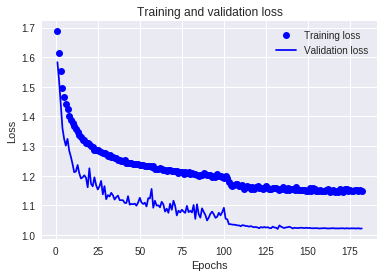

In [0]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

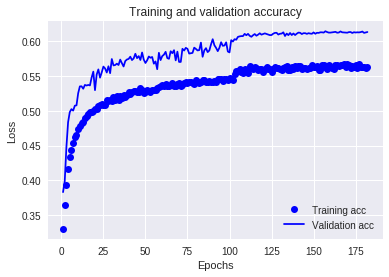

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing the model on  some images

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

def load_image(image_path, grayscale=False, target_size=None):
    pil_image = image.load_img(image_path, grayscale, target_size)
    return image.img_to_array(pil_image)

def load_detection_model(model_path):
    detection_model = cv2.CascadeClassifier(model_path)
    return detection_model

def detect_faces(detection_model, gray_image_array):
    return detection_model.detectMultiScale(gray_image_array, 1.3, 5)

def draw_bounding_box(face_coordinates, image_array, color):
    x, y, w, h = face_coordinates
    cv2.rectangle(image_array, (x, y), (x + w, y + h), color, 2)

def apply_offsets(face_coordinates, offsets):
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

def draw_text(coordinates, image_array, text, color, x_offset=0, y_offset=0,
                                                font_scale=0.5, thickness=2):
    x, y = coordinates[:2]
    cv2.putText(image_array, text, (x + x_offset, y + y_offset),
                cv2.FONT_HERSHEY_SIMPLEX,
                font_scale, color, thickness, cv2.LINE_AA)

def get_colors(num_classes):
    colors = plt.cm.hsv(np.linspace(0, 1, num_classes)).tolist()
    colors = np.asarray(colors) * 255
    return colors

In [0]:
import numpy as np
from scipy.misc import imread, imresize


def preprocess_input(x, v2=True):
    x = x.astype('float32')
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

def _imread(image_name):
        return imread(image_name)

def _imresize(image_array, size):
        return imresize(image_array, size)

def to_categorical(integer_classes, num_classes=2):
    integer_classes = np.asarray(integer_classes, dtype='int')
    num_samples = integer_classes.shape[0]
    categorical = np.zeros((num_samples, num_classes))
    categorical[np.arange(num_samples), integer_classes] = 1
    return categorical

In [0]:
def get_labels(dataset_name):
    if dataset_name == 'fer2013':
        return {0:'angry',1:'disgust',2:'fear',3:'happy',
                4:'sad',5:'surprise',6:'neutral'}
    elif dataset_name == 'imdb':
        return {0:'woman', 1:'man'}
    elif dataset_name == 'KDEF':
        return {0:'AN', 1:'DI', 2:'AF', 3:'HA', 4:'SA', 5:'SU', 6:'NE'}
    else:
        raise Exception('Invalid dataset name')

In [0]:
import sys

import cv2
from keras.models import load_model
import numpy as np

'''from utils.datasets import get_labels
from utils.inference import detect_faces
from utils.inference import draw_text
from utils.inference import draw_bounding_box
from utils.inference import apply_offsets
from utils.inference import load_detection_model
from utils.inference import load_image
from utils.preprocessor import preprocess_input'''

# parameters for loading data and images
image_path = sys.argv[1]
detection_model_path = 'drive/Colab Notebooks/emotion/haarcascade_frontalface_alt2.xml'
#emotion_model_path = 'trained_models/emotion_models/fer2013_mini_XCEPTION.102-0.66.hdf5'
emotion_model_path = 'drive/Colab Notebooks/emotion/XCEPTION/fer2013_mini_XCEPTION.93-0.65.hdf5'
#gender_model_path = 'trained_models/gender_models/simple_CNN.81-0.96.hdf5'
emotion_labels = get_labels('fer2013')
#gender_labels = get_labels('imdb')
font = cv2.FONT_HERSHEY_SIMPLEX

# hyper-parameters for bounding boxes shape
#gender_offsets = (30, 60)
#gender_offsets = (10, 10)
emotion_offsets = (20, 40)
emotion_offsets = (0, 0)

# loading models
face_detection = load_detection_model(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
#gender_classifier = load_model(gender_model_path, compile=False)

# getting input model shapes for inference
emotion_target_size = emotion_classifier.input_shape[1:3]
#gender_target_size = gender_classifier.input_shape[1:3]  

# loading images
rgb_image = load_image('drive/Colab Notebooks/emotion/testimg/ice.jpg', grayscale=False)
gray_image = load_image('drive/Colab Notebooks/emotion/testimg/ice.jpg', grayscale=True)
gray_image = np.squeeze(gray_image)
gray_image = gray_image.astype('uint8')



faces = detect_faces(face_detection, gray_image)
#faces = detect_faces(face_detection)
for face_coordinates in faces:
    #x1, x2, y1, y2 = apply_offsets(face_coordinates, gender_offsets)
    #rgb_face = rgb_image[y1:y2, x1:x2]

    x1, x2, y1, y2 = apply_offsets(face_coordinates, emotion_offsets)
    gray_face = gray_image[y1:y2, x1:x2]

    try:
        #rgb_face = cv2.resize(rgb_face, (gender_target_size))
        gray_face = cv2.resize(gray_face, (emotion_target_size))
    except:
        continue

    #rgb_face = preprocess_input(rgb_face, False)
    #rgb_face = np.expand_dims(rgb_face, 0)
    #gender_prediction = gender_classifier.predict(rgb_face)
    #gender_label_arg = np.argmax(gender_prediction)
    #gender_text = gender_labels[gender_label_arg]

    gray_face = preprocess_input(gray_face, True)
    gray_face = np.expand_dims(gray_face, 0)
    gray_face = np.expand_dims(gray_face, -1)
    emotion_label_arg = np.argmax(emotion_classifier.predict(gray_face))
    emotion_text = emotion_labels[emotion_label_arg]

    if emotion_text == emotion_labels[0]:
        color = (0, 0, 255)
    else:
        color = (255, 0, 0)

    draw_bounding_box(face_coordinates, rgb_image, color)
    #draw_text(face_coordinates, rgb_image, gender_text, color, 0, -20, 1, 2)
    draw_text(face_coordinates, rgb_image, emotion_text, color, -20, -20, 0.7, 2)

bgr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('drive/Colab Notebooks/emotion/images/ice3(xception).jpg', bgr_image)

True

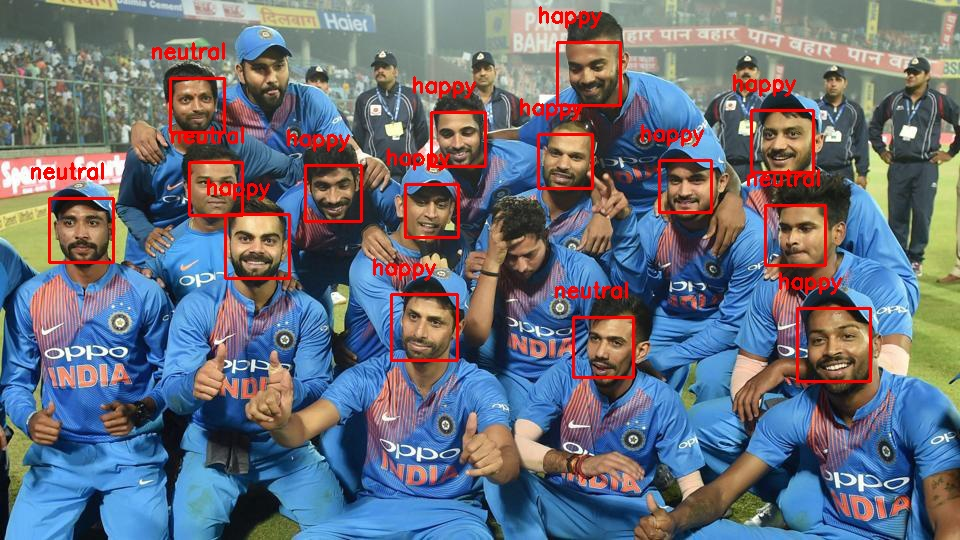

In [0]:
from IPython.display import Image
Image('drive/Colab Notebooks/emotion/images/cri4(simple_cnn).jpg')

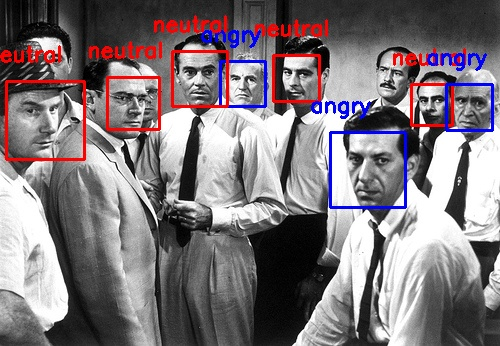

In [0]:
Image('drive/Colab Notebooks/emotion/images/ac2(simple_cnn).jpg')

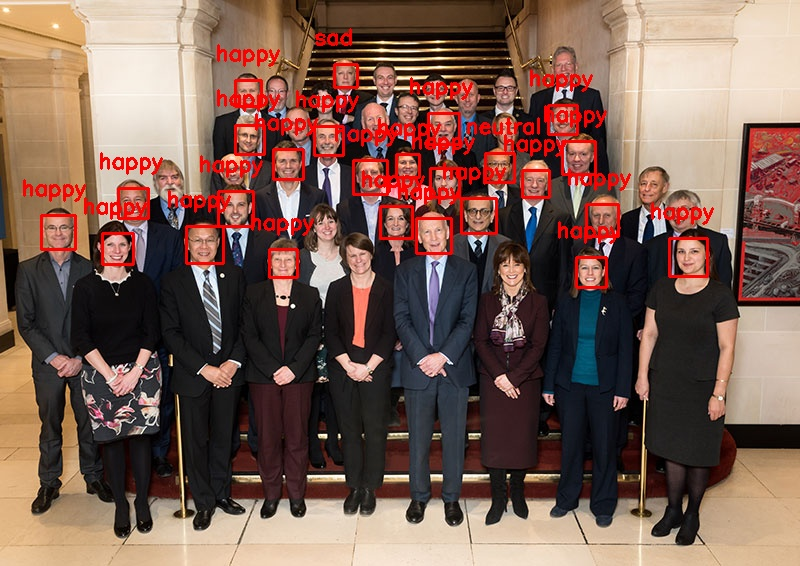

In [0]:
Image('drive/Colab Notebooks/emotion/images/ice1(simple_cnn).jpg')

# 2) Xception Model

In [0]:
input_shape=(48,48,1)
num_classes=7
l2_regularization=0.01
regularization = l2(l2_regularization)

 # base
img_input = Input(input_shape)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                              use_bias=False)(img_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(8, (3, 3), strides=(1, 1), kernel_regularizer=regularization,
                                              use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# module 1
residual = Conv2D(16, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(16, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# module 2
residual = Conv2D(32, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(32, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# module 3
residual = Conv2D(64, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(64, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

# module 4
residual = Conv2D(128, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
residual = BatchNormalization()(residual)

x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same',
                        kernel_regularizer=regularization,
                        use_bias=False)(x)
x = BatchNormalization()(x)

x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
x = layers.add([x, residual])

x = Conv2D(num_classes, (3, 3),
            #kernel_regularizer=regularization,
            padding='same')(x)
x = GlobalAveragePooling2D()(x)
output = Activation('softmax',name='predictions')(x)

model = Model(img_input, output)
   

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 46, 46, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 46, 46, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 46, 46, 8)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# parameters
batch_size = 100
num_epochs = 200
input_shape = (64, 64, 1)
validation_split = .2
verbose = 1
num_classes = 7
patience = 50
base_path = 'drive/Colab Notebooks/emotion/Xception2/'

# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

# model parameters/compilation
#model = model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


datasets = ['fer2013']
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    # callbacks
    log_file_path = base_path + dataset_name + '_emotion_training.log'
    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(patience/4), verbose=1)
    trained_models_path = base_path + dataset_name + '_mini_XCEPTION'
    model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
    callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = train_data
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        steps_per_epoch=len(train_faces) / batch_size,
                        epochs=num_epochs, verbose=1, callbacks=callbacks,
                        validation_data=val_data)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 46, 46, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 46, 46, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 46, 46, 8)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

for Xception model refer :

https://arxiv.org/pdf/1610.02357.pdf

https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/


In [0]:
score = model.evaluate(val_x, val_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

7178/7178 [==============================] - 2s 318us/step
Test loss: 1.0064882832538056
Test accuracy: 63.41599331290053


In [0]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

In [0]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

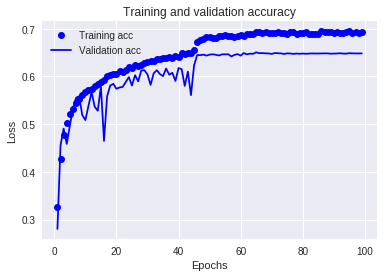

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Images tested on  Xception model

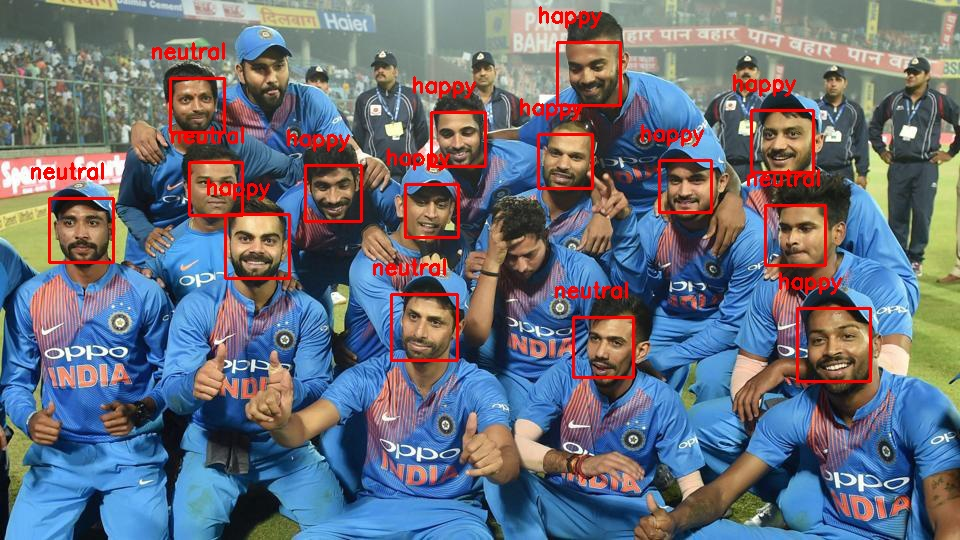

In [0]:
from IPython.display import Image
Image('drive/Colab Notebooks/emotion/images/cri5(xception).jpg')

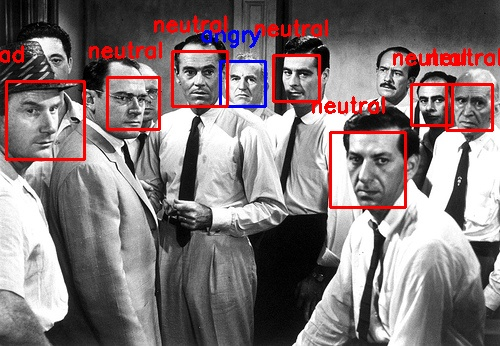

In [0]:
Image('drive/Colab Notebooks/emotion/images/ac3(xception).jpg')

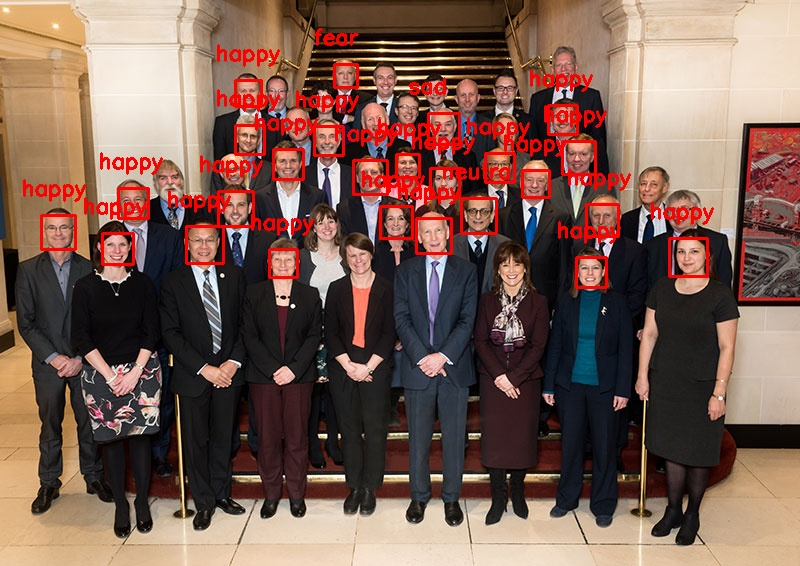

In [0]:
Image('drive/Colab Notebooks/emotion/images/ice2(xception).jpg')